In [1]:
import time

import pandas as pd # used to load the data
import numpy as np # optimized numerical library

from sklearn import preprocessing, metrics, utils, decomposition, model_selection, linear_model, discriminant_analysis, svm, tree, ensemble # library providing several ML algorithms and related utility
from imblearn import over_sampling # provides several resampling techniques to cope with unbalanced datasets (https://github.com/scikit-learn-contrib/imbalanced-learn) compatible with sklearn

from collections import Counter

import matplotlib.pyplot as plt # used for plotting

# Start by defining three helper functions:
# - one to plot the sample distribution  acorss the class labels (to see how un-/balanced the dataset is)
# - one to compute and plot the confusion matrix
# - one to plot data in 2D with different colors per class label

def plot_pie(y, labels, title=""):
    target_stats = Counter(y)
    sizes = list(target_stats.values())
    explode = tuple([0.1] * len(target_stats))

    fig, ax = plt.subplots()
    ax.set_title(title + " (size: %d)" % len(y))
    ax.pie(sizes, explode=explode, labels=target_stats.keys(), shadow=True, autopct='%1.1f%%')
    ax.axis('equal')


def compute_and_plot_cm(ytest, ypred, labels, title=""):
    global nfigure
    # Compute confusion matrix
    cm = metrics.confusion_matrix(ytest, ypred)
    
    accuracy = metrics.accuracy_score(ytest, ypred, normalize=True)

    # Normalize the matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    print(cm)

    # Plot the confusion matrix

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues) # plot the confusionmatrix using blue shaded colors
    plt.title("Confusion Matrix Normalized (%s) Accuracy: %.1f%%" % (title, accuracy*100)) # add title
    plt.colorbar() # plot the color bar as legend

    # Plot the x and y ticks using the class label names
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)


def plot_2d(xpred, ypred, labels, title=""):
    global nfigure
    # define the colors to use for each class label
    colors = ['red', 'blue', 'green', 'yellow', 'black']
    len_colors = len(colors)
    if len_colors < len(labels):
        print("WARNING: we have less colors than classes: some classes will reuse the same color")

    nfigure = nfigure + 1
    plt.figure(nfigure) # new numbered figure
    plt.title("Feature Space (%s)" % title) # add title


    # plot each class label with a separate color 
    for c in range(len(labels)):
        cur_class = (ypred == c) # get all points belonging to class c
        plt.plot(xpred[cur_class, 0], xpred[cur_class, 1], 'o', color=colors[c % len_colors]) # plot class c


nfigure = 0 #used to number the figures

# 1. Loading and visualizing the data

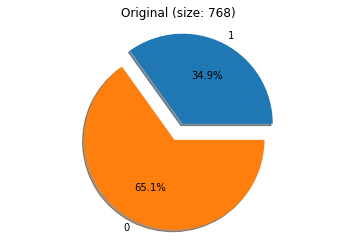

In [2]:
################ Load data ####################
# Get the dataset loaded and define class labels 
data = pd.read_csv('data/diabetes.csv', header=0)
data_class_labels = ["no diabetes", "diabetes"]

# All data columns except last are input features (X), last column is output label (y)
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]

plot_pie(y, data_class_labels, "Original")
plt.show()

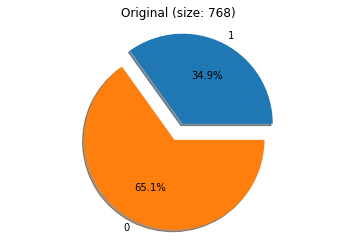

In [3]:
data = pd.read_csv('data/diabetes.csv', header=0)
data_class_labels = ["no diabetes", "diabetes"]
n_features = len(data.columns) - 1

X = data.iloc[:,0:n_features]
y = data.iloc[:,n_features]
n_features
plot_pie(y, data_class_labels, "Original")
plt.show()

# 2. Preparing the data set
## Split the data into traning and testing: model_selection.train_test_split()

In [4]:
################ Split data ####################
# Split data in training and testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, random_state=42)

## Find the size and value ranges of X_train
Do you see any problem? 
What function  to use to find the max and min values for each feature? 

In [5]:
# Check the size of X_train

In [6]:
# find the max values of all features

In [7]:
# find the min values of all features

### Standardizing the  data range: preprocessing.StandardScaler().fit()

In [8]:
################ Scale data ####################
# Train a scaler to standardize the features (zero mean and unit variance)
scaler = preprocessing.StandardScaler().fit(X_train)

# ... and scale the features
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Finding the two principle components: decomposition.PCA(n_components=n).fit()

In [9]:
################ PCA ####################
# Train a PCA with 2 dimensions
pca = decomposition.PCA(n_components=2).fit(X_train_scaled)

# ... and apply it to the features
X_train_scaled_pca = pca.transform(X_train_scaled)
X_test_scaled_pca = pca.transform(X_test_scaled)

# 3. Logistic Regression:  linear_model.LogisticRegression().fit()
### Original feature: fit, predict, accuracy, confusion metrics

Acuracy of LR : 74.4%
[[ 0.80952381  0.19047619]
 [ 0.38372093  0.61627907]]


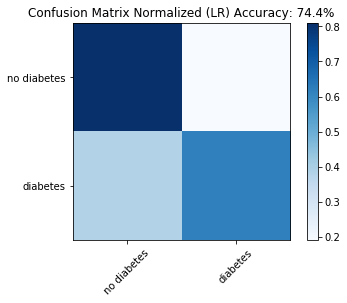

In [10]:
################ Logit ##################
# Train a Logit model on the original features
lr = linear_model.LogisticRegression().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
y_lr = lr.predict(X_test_scaled)

# Print the accuracy
print("Acuracy of LR : %.1f%%" % (metrics.accuracy_score(y_test,y_lr)*100))

# Compute and print and confusion matrix
compute_and_plot_cm(y_test, y_lr, data_class_labels, title="LR")
plt.show()

### Two principle components:  fit, predict, accuracy, confusion metrics

Accuracy of LR + PCA: 70.1%
[[ 0.83333333  0.16666667]
 [ 0.55813953  0.44186047]]


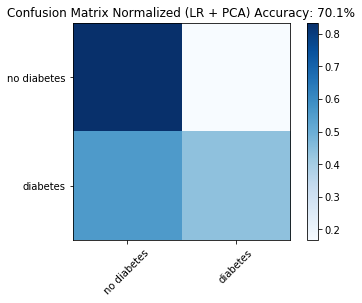

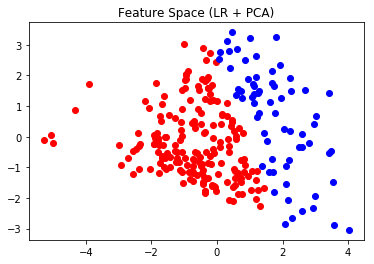

In [11]:
# Train a Logit model on pca extracted features
lr_pca = linear_model.LogisticRegression().fit(X_train_scaled_pca, y_train)

# Compute the predicted labels on test data
y_lr_pca = lr_pca.predict(X_test_scaled_pca)

# Print the accuracy
print("Accuracy of LR + PCA: %.1f%%" % (metrics.accuracy_score(y_test,y_lr_pca)*100))

# Compute and print and confusion matrix
compute_and_plot_cm(y_test, y_lr_pca, data_class_labels, title="LR + PCA")
plt.show()

# visualize the predictions based on 2 PCA components
plot_2d(X_test_scaled_pca, y_lr_pca, data_class_labels, title="LR + PCA")
plt.show()

# 4. LDA: discriminant_analysis.LinearDiscriminantAnalysis().fit()
### Original feature: fit, predict, accuracy, confusion metrics

In [12]:
################ LDA ##################
# Train an LDA model on original features
#lda = discriminant_analysis.LinearDiscriminantAnalysis().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
#y_lda = 

# Print the accuracy
#print("Accuracy of LDA: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")

### Two principle components: fit, predict, accuracy, confusion metrics

In [13]:
# Train an LDA model on pca extracted features
# lda_pca = discriminant_analysis.LinearDiscriminantAnalysis().fit(,)

# Compute the predicted labels on test data
# y_lda_pca =

# Print the accuracy
#print("Accuracy of LDA+PCA: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")

# visualize the predictions based on 2 PCA components
#plot_2d(,, , title="")

# 4. QDA: discriminant_analysis.QuadraticDiscriminantAnalysis().fit()
### Original feature: fit, predict, accuracy, confusion metrics

In [14]:
################ QDA ##################
# Train a QDA model on original features
qda = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
#y_qda =

# Print the accuracy
#print("Accuracy of QDA: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")



### Two principle components: fit, predict, accuracy, confusion metrics

In [15]:
# Train a QDA model on pca extracted features
#qda_pca = discriminant_analysis.QuadraticDiscriminantAnalysis().fit(, )

# Compute the predicted labels on test data
#y_qda_pca=

# Print the accuracy
#print("Accuracy of QDA+PCA: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")

# visualize the predictions based on 2 PCA components
#plot_2d(,, , title="")

# 5. ELDA
### Expanded bases of original feature: preprocessing.PolynomialFeatures(degree=k).fit()

In [16]:
################ Polynomial expanded features ##################
# Train a polynomial expansion on original features
poly2 = preprocessing.PolynomialFeatures(degree=2).fit(X_train_scaled_pca)

# ... and apply it to the features
X_train_scaled_poly2 = poly2.transform(X_train_scaled_pca)
X_test_scaled_poly2 = poly2.transform(X_test_scaled_pca)

### Fitting LDA on the expanded features: discriminant_analysis.linearDiscriminantAnalysis().fit()

In [17]:
################  LDA on expanded ##################
# Train an LDA model on the original expanded features
#lda_poly2 = discriminant_analysis.LinearDiscriminantAnalysis().fit(, )

# Compute the predicted labels on test data
#y_lda_poly2=

# Print the accuracy
#print("Accuracy of ELDA: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")



# 6. Support Vector Machine: svm.SVC().fit()

In [18]:
################ SVM ##################
# Train a SVM model on the original features
#sv = svm.SVC().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
#y_sv = sv.

# Print the accuracy
#print("Accuracy of SVM: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")




### Homework: apply SVM on the 2 principle components

# 7. Decision Tree: tree.DecisionTreeClassifier(max_depth=n).fit()


In [19]:
################ DecisionTree ##################
# Train a DT model on the original features
#dt = tree.DecisionTreeClassifier(max_depth=5).fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
#y_dt = dt. 


# Print the accuracy
#print("Accuracy of DT: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")


### Homework: apply Decision Tree on the 2 principle components

# 8. Random Forest:  ensemble.RandomForestClassifier.fit()

In [20]:
################ RandomForest ##################
# Train a RF model on the original features
#rf = ensemble.RandomForestClassifier().fit(X_train_scaled, y_train)

# Compute the predicted labels on test data
#y_rf = rf.


# Print the accuracy
#print("Accuracy of Random Forest: %.1f%%" % (metrics.accuracy_score(,)*100))

# Compute and print and confusion matrix
#compute_and_plot_cm(, , , title="")


### Homework: apply Random Forest on the 2 principle components